# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [1]:
import numpy as np

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [344]:
def max_element(arr):
    if all(arr != 0):
        return "None"
    else:
        n = np.where(arr == 0)[0] + 1
        n = np.delete(n, [np.where(n > len(x) - 1)])
        return arr[n].max()

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) 
max_element(x)

5

**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [357]:
def nearest_value(X, v):
    X1 = X[abs(X - v) == abs(X - v).min()]
    return np.unique(X1)

X = np.arange(0,10).reshape((2, 5))
v = 3.6
nearest_value(X, v)

array([4])

**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [156]:
def scale(X):
    std = X.std(axis = 0)
    mean = X.mean(axis = 0)
    if any(std == 0):
        print("Ошибка Деления На Огурец, Переустановите Вселенную И Перезапуститесь")
    else:
        X1 = (X - mean) / std
        return X1

A = np.random.randint(-10, 10, (4, 4))
scale(A)

array([[-0.08304548,  0.33333333,  1.17953565,  1.03142125],
       [ 1.07959124, -0.55555556,  0.58976782, -1.65027399],
       [-1.57786412, -1.22222222, -0.29488391,  0.4125685 ],
       [ 0.58131836,  1.44444444, -1.47441956,  0.20628425]])

In [157]:
A = np.array([[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]])
scale(A)

Ошибка Деления На Огурец, Переустановите Вселенную И Перезапуститесь


**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [63]:
def get_stats(X):
    print ("Определитель:", np.linalg.det(X), "\n",
               "След:", X.trace(), "\n",
               "Минимум:", X.min(),"\n",
               "Максимум:", X.max(), "\n",
               "Норма Фробениуса:", np.linalg.norm(X), "\n",
               "Собственные числа:", np.linalg.eigvals(X))
    if np.linalg.det(X) != 0:
        print ("Обратная матрица:", "\n", np.linalg.inv(X))
        
matr = np.random.normal(loc = 10.0, scale = 1.0, size = (3, 3))
matr

array([[ 10.28030025,  11.25704994,   9.76189964],
       [  8.46914944,   8.4804313 ,   8.58974203],
       [  8.36055141,  10.12542967,  11.50129862]])

In [64]:
get_stats(matr)

Определитель: -34.5195813046 
 След: 30.2620301713 
 Минимум: 8.36055141295 
 Максимум: 11.5012986181 
 Норма Фробениуса: 29.151866535 
 Собственные числа: [ 28.86873869   1.99320191  -0.59991043]
Обратная матрица: 
 [[-0.30594647  0.88724323 -0.40296073]
 [ 0.74135421 -1.06090334  0.1630999 ]
 [-0.43026869  0.28903341  0.23627917]]


**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [392]:
maximum = np.zeros((100, 1))
for exp_num in range(100): # Это тут с самого начала так и было :)
    matrix1 = np.random.normal(size = (10, 10))
    matrix2 = np.random.normal(size = (10, 10))
    maximum[exp_num] = (matrix1 @ matrix2).max()
    
print ("Среднее:", maximum.mean(), "\n",
       "95%:", np.percentile(maximum, 95))

Среднее: 8.35619288433 
 95%: 11.649907299


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [474]:
import pandas as pd

data = pd.read_csv('2008.csv')
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [475]:
any(data.isnull())

True

**В данных имеются пропуски.**

In [476]:
data.isnull().sum().sum()

355215

**Общее количество пропущенных значений: 355 215**

In [477]:
data.isnull().sum(axis = 1)[data.isnull().sum(axis = 1) != 0].count()

70000

**Пропущенные значения есть во всех 70 000 объектах.**

In [478]:
data.isnull().sum()[data.isnull().sum() != 0].count()

16

**16 признаков имеют пропущенные значения**

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [479]:
any(data["DepDelay"].isnull())

True

**В целевой переменной есть пропущенные значения.**

In [480]:
with pd.option_context('display.max_columns', None):
    print(data[data["DepDelay"].isnull()])

       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
11     2008      3           6          4      NaN        1605      NaN   
78     2008      1          19          6      NaN         750      NaN   
103    2008      7          24          4      NaN        1230      NaN   
112    2008      2           4          1      NaN         620      NaN   
128    2008      1          21          1      NaN        1838      NaN   
194    2008      1          28          1      NaN        1640      NaN   
204    2008      6          13          5      NaN        1229      NaN   
236    2008      7          19          6      NaN         544      NaN   
257    2008      4          19          6      NaN        1345      NaN   
267    2008      9          23          2      NaN        1400      NaN   
269    2008      2          17          7      NaN        1345      NaN   
288    2008      9          14          7      NaN        1115      NaN   
352    2008      1       

In [481]:
with pd.option_context('display.max_columns', None):
    print(data[data["DepDelay"].isnull()].describe())

         Year        Month   DayofMonth    DayOfWeek  DepTime   CRSDepTime  \
count  1399.0  1399.000000  1399.000000  1399.000000      0.0  1399.000000   
mean   2008.0     5.646891    15.562545     3.987848      NaN  1379.989993   
std       0.0     3.705114     8.585107     2.018653      NaN   462.847110   
min    2008.0     1.000000     1.000000     1.000000      NaN    50.000000   
25%    2008.0     2.000000     9.000000     2.000000      NaN  1000.000000   
50%    2008.0     5.000000    15.000000     4.000000      NaN  1420.000000   
75%    2008.0     9.000000    22.000000     6.000000      NaN  1755.000000   
max    2008.0    12.000000    31.000000     7.000000      NaN  2359.000000   

       ArrTime   CRSArrTime    FlightNum  ActualElapsedTime  CRSElapsedTime  \
count      0.0  1399.000000  1399.000000                0.0     1395.000000   
mean       NaN  1543.809149  2789.937098                NaN      114.856631   
std        NaN   480.819451  2131.389377                NaN 

**Для всех этих объектов значение признака Cancelled равно 1 (рейс отменили, следовательно, не может быть речи о задержке рейса). Для этих объектов также будут отсутствовать значения признаков DepTime, ArrTime, ActualElapsedTime, AirTime, ArrDelay, TaxiIn, TaxiOut, а также признаки, кодирующие причину задержки; признак Diverted - с нулевыми значениями.
Исключаем переменную Cancelled, которая (после удаления объектов с нулевыми и отсутствующими значениями целевой переменной) для всех объектов будет равна 0, ergo, не будет иметь никакого смысла; бесполезна будет и переменная CancellationCode, показывающая причину отмены рейса.**

In [482]:
data2 = data[(data["DepDelay"].notnull()) & (data["DepDelay"] != 0)].drop(["Cancelled", "CancellationCode"], axis = 1)
DepDelay, data3 = data2["DepDelay"], data2.drop("DepDelay", axis = 1)
data3.shape

(63404, 26)

In [483]:
DepDelay.head()

0    16.0
1    16.0
2    -2.0
3    -3.0
4    -5.0
Name: DepDelay, dtype: float64

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [484]:
data3["DepTime_Hour"] = np.floor((data3["DepTime"] / 100))
data3["DepTime_Minute"] = data3["DepTime"] - (data3["DepTime_Hour"] * 100)

data3["CRSDepTime_Hour"] = np.floor((data3["CRSDepTime"] / 100))
data3["CRSDepTime_Minute"] = data3["CRSDepTime"] - (data3["CRSDepTime_Hour"] * 100)

data3["ArrTime_Hour"] = np.floor((data3["ArrTime"] / 100))
data3["ArrTime_Minute"] = data3["ArrTime"] - (data3["ArrTime_Hour"] * 100)

data3["CRSArrTime_Hour"] = np.floor((data3["CRSArrTime"] / 100))
data3["CRSArrTime_Minute"] = data3["CRSArrTime"] - (data3["CRSArrTime_Hour"] * 100)

data3.loc[data3["ArrTime"].isnull(), ["ArrTime", "ArrTime_Hour", "ArrTime_Minute"]].head()

,ArrTime,ArrTime_Hour,ArrTime_Minute
149,NaN,NaN,NaN
631,NaN,NaN,NaN
637,NaN,NaN,NaN
673,NaN,NaN,NaN
1083,NaN,NaN,NaN


In [485]:
data4 = data3.drop(["DepTime", "CRSDepTime", "ArrTime", "CRSArrTime"], axis = 1)
data4.head()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11.0,20.0,55.0,23.0,8.0,23.0,0.0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26.0,14.0,10.0,17.0,30.0,17.0,28.0
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43.0,11.0,45.0,15.0,1.0,15.0,20.0
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41.0,11.0,44.0,13.0,23.0,13.0,35.0
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15.0,8.0,20.0,12.0,43.0,13.0,0.0


**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [486]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63404 entries, 0 to 69999
Data columns (total 30 columns):
Year                 63404 non-null int64
Month                63404 non-null int64
DayofMonth           63404 non-null int64
DayOfWeek            63404 non-null int64
UniqueCarrier        63404 non-null object
FlightNum            63404 non-null int64
TailNum              63404 non-null object
ActualElapsedTime    63240 non-null float64
CRSElapsedTime       63399 non-null float64
AirTime              63240 non-null float64
ArrDelay             63240 non-null float64
Origin               63404 non-null object
Dest                 63404 non-null object
Distance             63404 non-null int64
TaxiIn               63264 non-null float64
TaxiOut              63397 non-null float64
Diverted             63404 non-null int64
CarrierDelay         14866 non-null float64
WeatherDelay         14866 non-null float64
NASDelay             14866 non-null float64
SecurityDelay        14866 no

In [487]:
data4.select_dtypes(["float"]).corrwith(DepDelay)[:-8]

ActualElapsedTime    0.041946
CRSElapsedTime       0.034302
AirTime              0.025237
ArrDelay             0.933526
TaxiIn               0.020640
TaxiOut              0.101294
CarrierDelay         0.532696
WeatherDelay         0.238872
NASDelay             0.171591
SecurityDelay        0.010668
LateAircraftDelay    0.553806
dtype: float64

Переменная ArrDelay оказывается СИЛЬНО коррелированной с объясняемой переменной (0.93), что логично, поскольку (по смыслу) задержка прибытия не должна сильно отличаться от задержки отправления.
Можно также заметить, что одновременное присутствие в датасете признаков типа DepTime, CRSDepTime, ArrTime и CRSArrTime позволяет вычислить длительность задержки рейса, не прибегая к построению прогностических моделей - достаточно просто вычесть из фактического времени время, указанное в расписании (CRS). Таким образом, одновременное нахождение этих признаков в датасете вовсе не необходимо; кажется логичным оставить только время, указанное в расписании (и попробовать спрогнозировать задержку, исходя из расписания).
Показатели причины задержки (CarrierDelay и т. д.), казалось бы, также должны нести значительную информацию о задержке рейса, однако, как видно, эти показатели не так сильно коррелируют с объясняемой переменной.

**Удаляем ArrDelay, DepTime_Hour, DepTime_Minute, ArrTime_Hour, ArrTime_Minute.**

In [488]:
data5 = data4.drop(["ArrDelay", "DepTime_Hour", "DepTime_Minute", "ArrTime_Hour", "ArrTime_Minute", "TailNum", "Year"], axis = 1)
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63404 entries, 0 to 69999
Data columns (total 23 columns):
Month                63404 non-null int64
DayofMonth           63404 non-null int64
DayOfWeek            63404 non-null int64
UniqueCarrier        63404 non-null object
FlightNum            63404 non-null int64
ActualElapsedTime    63240 non-null float64
CRSElapsedTime       63399 non-null float64
AirTime              63240 non-null float64
Origin               63404 non-null object
Dest                 63404 non-null object
Distance             63404 non-null int64
TaxiIn               63264 non-null float64
TaxiOut              63397 non-null float64
Diverted             63404 non-null int64
CarrierDelay         14866 non-null float64
WeatherDelay         14866 non-null float64
NASDelay             14866 non-null float64
SecurityDelay        14866 non-null float64
LateAircraftDelay    14866 non-null float64
CRSDepTime_Hour      63404 non-null float64
CRSDepTime_Minute    63404

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [489]:
%matplotlib inline

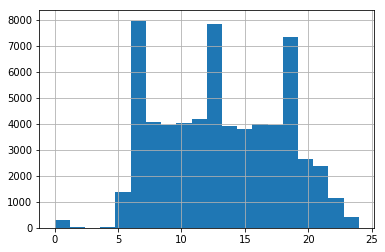

In [498]:
data4['DepTime_Hour'].hist(bins=20)

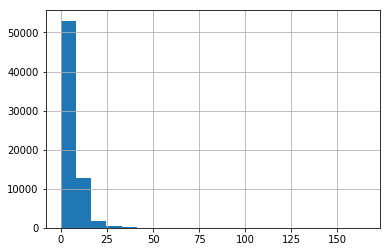

In [496]:
data['TaxiIn'].hist(bins=20)

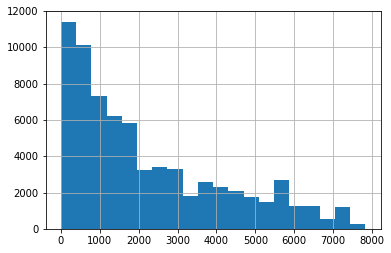

In [497]:
data['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

**Проблема - в различных единицах измерения (часы, минуты, безразмерные номера), что приводит к различному размаху значений и сложностям при сопоставлении признаков. В ходе масштабирования все признаки приводятся к одной шкале измерения (нулевое среднее и единичное стандартное отклонение).**

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [537]:
def transform_data(data):
    # Your code here

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [538]:
# Your code here

**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [ ]:
# Your code here

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [ ]:
# Your code here

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [ ]:
# Your code here

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [ ]:
# Your code here

**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [ ]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    pass

In [ ]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    pass

In [ ]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pass

In [ ]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pass

In [ ]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pass

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [ ]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [ ]:
# Your code here

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [ ]:
# Your code here